# Import Library

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import keras
keras.backend.clear_session()

from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1.0
set_session(tf.Session(config=config)) # 此处不同

Using TensorFlow backend.


In [2]:
import keras
keras.backend.clear_session()

In [3]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [4]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [5]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [6]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [7]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
import keras

def build_model():
    
    keras.backend.clear_session()
    model = Sequential()
    #卷積層1
    model.add(Conv2D(filters=32, kernel_size=(3,3),
                     input_shape=(32, 32, 3), 
                     activation='relu', 
                     padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                     activation='relu', padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dropout(rate=0.25))

    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))

    model.add(Dense(10, activation='softmax'))

    return model

#檢查model 的STACK
model = build_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

In [30]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def show_train_history(train_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(train_history.history['acc'], label='train')
    ax1.plot(train_history.history['val_acc'], label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    ax2.plot(train_history.history['loss'], label='train')
    ax2.plot(train_history.history['val_loss'], label='validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()

In [26]:
model.compile(loss='MSE', optimizer='sgd', metrics=['accuracy'])
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 237s 6ms/step - loss: 0.0897 - acc: 0.1269 - val_loss: 0.0893 - val_acc: 0.1736
Epoch 2/10
40000/40000 [==============================] - 224s 6ms/step - loss: 0.0887 - acc: 0.1655 - val_loss: 0.0884 - val_acc: 0.2256
Epoch 3/10
40000/40000 [==============================] - 221s 6ms/step - loss: 0.0871 - acc: 0.2063 - val_loss: 0.0869 - val_acc: 0.2584
Epoch 4/10
40000/40000 [==============================] - 218s 5ms/step - loss: 0.0851 - acc: 0.2442 - val_loss: 0.0852 - val_acc: 0.2808
Epoch 5/10
40000/40000 [==============================] - 214s 5ms/step - loss: 0.0835 - acc: 0.2683 - val_loss: 0.0839 - val_acc: 0.3043
Epoch 6/10
40000/40000 [==============================] - 228s 6ms/step - loss: 0.0824 - acc: 0.2917 - val_loss: 0.0832 - val_acc: 0.3193
Epoch 7/10
40000/40000 [==============================] - 228s 6ms/step - loss: 0.0813 - acc: 0.3076 - val_loss: 0.0820 - 

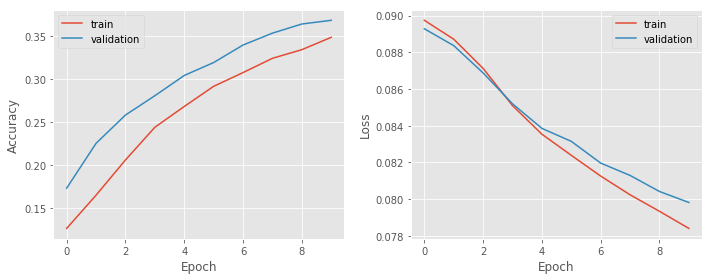

In [31]:
show_train_history(train_history)

In [34]:
model = build_model()
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=32, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 159s 4ms/step - loss: 0.3198 - acc: 0.9000 - val_loss: 0.3139 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 148s 4ms/step - loss: 0.2999 - acc: 0.9002 - val_loss: 0.2966 - val_acc: 0.9000
Epoch 3/10
40000/40000 [==============================] - 145s 4ms/step - loss: 0.2863 - acc: 0.9008 - val_loss: 0.2871 - val_acc: 0.9002
Epoch 4/10
40000/40000 [==============================] - 145s 4ms/step - loss: 0.2782 - acc: 0.9015 - val_loss: 0.2803 - val_acc: 0.9003
Epoch 5/10
40000/40000 [==============================] - 157s 4ms/step - loss: 0.2699 - acc: 0.9024 - val_loss: 0.2744 - val_acc: 0.9002
Epoch 6/10
40000/40000 [==============================] - 159s 4ms/step - loss: 0.2633 - acc: 0.9036 - val_loss: 0.2677 - val_acc: 0.9008
Epoch 7/10
40000/40000 [==============================] - 159s 4ms/step - loss: 0.2567 - acc: 0.9047 - val_loss: 0.2622 - 

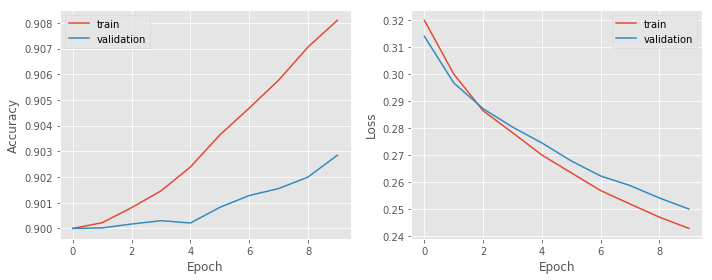

In [35]:
show_train_history(history)